In [1]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunc as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "./matrix/"

In [4]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

In [5]:
def make_plot(normsGradient_PR, normsGradient_HS, normsGradient_FR,
              relativeErrors_PR, relativeErrors_HS, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'serif',         
        'weight': 'normal',
        'size': 20}

    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    # Title
    fig.suptitle(
            'Matrix Type  ' + type + ' Relative error and gradient norm')
    
    x = list(range(len(relativeErrors_PR)))
    axs[0].plot(x, relativeErrors_PR, label = "PR")
    axs[1].plot(x, normsGradient_PR, label = 'PR')
        
    
    x = list(range(len(relativeErrors_FR)))
    axs[0].plot(x, relativeErrors_FR, label = 'FR')
    axs[1].plot(x, normsGradient_FR, label = 'FR')
    
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Gradient Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

# Experiments on Matrix M1

In [6]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [7]:
f = nf.Norm(M1)

In [8]:
initial_vector = f.init_x()

In [9]:
norm = la.norm(M1, ord=2) ** 2

PR beta

In [10]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 804.0146, ||gradient(f(x))|| = 1696.393481, alpha=0.0783, rate=0.0000
iteration 2, f(x) = 916.6745, ||gradient(f(x))|| = 270.197267, alpha=0.1742, rate=0.4184
iteration 3, f(x) = 953.4866, ||gradient(f(x))|| = 61.390963, alpha=0.3039, rate=0.4615
iteration 4, f(x) = 968.5993, ||gradient(f(x))|| = 30.818871, alpha=0.5366, rate=0.6187
iteration 5, f(x) = 978.7909, ||gradient(f(x))|| = 23.220146, alpha=0.7330, rate=0.7470
iteration 6, f(x) = 990.8769, ||gradient(f(x))|| = 12.700006, alpha=1.2655, rate=0.7716
iteration 7, f(x) = 999.3088, ||gradient(f(x))|| = 5.494813, alpha=1.6176, rate=0.6489
iteration 8, f(x) = 1004.5802, ||gradient(f(x))|| = 2.408975, alpha=2.2459, rate=0.6226
iteration 9, f(x) = 1008.2605, ||gradient(f(x))|| = 1.196896, alpha=3.5350, rate=0.6210
iteration 10, f(x) = 1010.8530, ||gradient(f(x))|| = 0.611565, alpha=4.9657, rate=0.5740
iteration 11, f(x) = 1012.4502, ||gradient(f(x))|| = 0.197261, alpha=5.8250, rate=0.4772
iteration 12, f(x) =

HS beta

In [11]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='HS', verbose = True)
gradientsCG_HS, normsCG, errorsCG_HS = optimizerCG.run(500)

[start]
iteration 1, f(x) = 804.0146, ||gradient(f(x))|| = 1696.393481, alpha=0.0783, rate=0.0000
iteration 2, f(x) = 916.6745, ||gradient(f(x))|| = 270.197267, alpha=0.1742, rate=0.4184
iteration 3, f(x) = 953.4866, ||gradient(f(x))|| = 61.390963, alpha=0.3039, rate=0.4615
iteration 4, f(x) = 968.5993, ||gradient(f(x))|| = 30.818871, alpha=0.5366, rate=0.6187
iteration 5, f(x) = 978.7909, ||gradient(f(x))|| = 23.220146, alpha=0.7330, rate=0.7470
iteration 6, f(x) = 990.8769, ||gradient(f(x))|| = 12.700006, alpha=1.2655, rate=0.7716
iteration 7, f(x) = 999.3088, ||gradient(f(x))|| = 5.494813, alpha=1.6176, rate=0.6489
iteration 8, f(x) = 1004.5802, ||gradient(f(x))|| = 2.408975, alpha=2.2459, rate=0.6226
iteration 9, f(x) = 1008.2605, ||gradient(f(x))|| = 1.196896, alpha=3.5350, rate=0.6210
iteration 10, f(x) = 1010.8530, ||gradient(f(x))|| = 0.611565, alpha=4.9657, rate=0.5740
iteration 11, f(x) = 1012.4502, ||gradient(f(x))|| = 0.197261, alpha=5.8250, rate=0.4772
iteration 12, f(x) =

FR beta

In [12]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 804.0146, ||gradient(f(x))|| = 1696.393481, alpha=0.0783, rate=0.0000
iteration 2, f(x) = 916.6745, ||gradient(f(x))|| = 270.197267, alpha=0.1742, rate=0.4184
iteration 3, f(x) = 953.8066, ||gradient(f(x))|| = 58.055712, alpha=0.3117, rate=0.4615
iteration 4, f(x) = 968.3854, ||gradient(f(x))|| = 31.129374, alpha=0.5420, rate=0.6154
iteration 5, f(x) = 978.7617, ||gradient(f(x))|| = 23.540397, alpha=0.7288, rate=0.7546
iteration 6, f(x) = 990.3394, ||gradient(f(x))|| = 15.022679, alpha=1.1474, rate=0.7686
iteration 7, f(x) = 998.7270, ||gradient(f(x))|| = 6.894004, alpha=1.2964, rate=0.6640
iteration 8, f(x) = 1003.9290, ||gradient(f(x))|| = 3.529306, alpha=1.6725, rate=0.6334
iteration 9, f(x) = 1007.6247, ||gradient(f(x))|| = 2.072221, alpha=2.2723, rate=0.6410
iteration 10, f(x) = 1010.2780, ||gradient(f(x))|| = 1.260299, alpha=2.7399, rate=0.6022
iteration 11, f(x) = 1012.0571, ||gradient(f(x))|| = 0.564604, alpha=2.9762, rate=0.5257
iteration 12, f(x) =

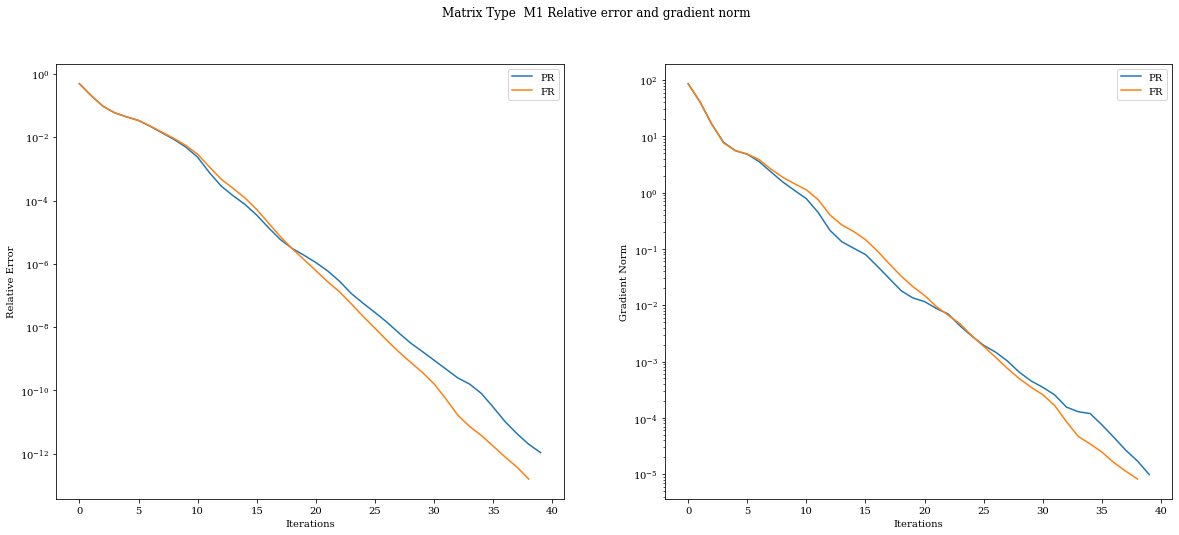

In [13]:
make_plot(gradientsCG_PR, gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M1', experiment_name='CG-M1')

# Experiments on Matrix M1 With gradient descent

In [14]:
import src.gd as GD

In [15]:
def make_plot(normsGradient_PR, normsGradient_GD, normsGradient_FR,
              relativeErrors_PR, relativeErrors_GD, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'serif',         
        'weight': 'normal',
        'size': 20}
    
    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    # Title
    fig.suptitle(
            'Matrix Type  ' + type + ' Relative error and gradient norm')
    
    
    x = list(range(len(relativeErrors_PR)))
    axs[0].plot(x, relativeErrors_PR, label = "PR")
    axs[1].plot(x, normsGradient_PR, label = 'PR')
    

    x = list(range(len(relativeErrors_GD)))
    axs[0].plot(x, relativeErrors_GD, label = 'GD')
    axs[1].plot(x, normsGradient_GD, label = 'GD')
    

    x = list(range(len(relativeErrors_FR)))
    axs[0].plot(x, relativeErrors_FR, label = 'FR')
    axs[1].plot(x, normsGradient_FR, label = 'FR')
        
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Gradient Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

In [16]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsSGD = []
gradientsSGD = []

In [17]:
f = nf.Norm(M1)
initial_vector = f.init_x()
norm = la.norm(M1, ord=2) ** 2

In [18]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 744.5287, ||gradient(f(x))|| = 1250.288008, alpha=0.1163, rate=0.0000
iteration 2, f(x) = 870.2388, ||gradient(f(x))|| = 246.775719, alpha=0.2839, rate=0.4839
iteration 3, f(x) = 941.9009, ||gradient(f(x))|| = 66.157359, alpha=0.7234, rate=0.5321
iteration 4, f(x) = 975.6525, ||gradient(f(x))|| = 20.673921, alpha=1.2191, rate=0.4988
iteration 5, f(x) = 992.7900, ||gradient(f(x))|| = 9.191861, alpha=1.9112, rate=0.5267
iteration 6, f(x) = 1004.2546, ||gradient(f(x))|| = 3.089512, alpha=2.8786, rate=0.5438
iteration 7, f(x) = 1009.4412, ||gradient(f(x))|| = 1.078589, alpha=3.7093, rate=0.4388
iteration 8, f(x) = 1011.5758, ||gradient(f(x))|| = 0.382940, alpha=4.1962, rate=0.4214
iteration 9, f(x) = 1012.4593, ||gradient(f(x))|| = 0.138828, alpha=4.7663, rate=0.4349
iteration 10, f(x) = 1012.8039, ||gradient(f(x))|| = 0.064312, alpha=5.0443, rate=0.4623
iteration 11, f(x) = 1013.0212, ||gradient(f(x))|| = 0.044137, alpha=6.8362, rate=0.5463
iteration 12, f(x) =

HS beta

In [19]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='HS', verbose = True)
gradientsCG_HS, normsCG, errorsCG_HS = optimizerCG.run(500)

[start]
iteration 1, f(x) = 744.5287, ||gradient(f(x))|| = 1250.288008, alpha=0.1163, rate=0.0000
iteration 2, f(x) = 870.2388, ||gradient(f(x))|| = 246.775719, alpha=0.2839, rate=0.4839
iteration 3, f(x) = 941.9009, ||gradient(f(x))|| = 66.157359, alpha=0.7234, rate=0.5321
iteration 4, f(x) = 975.6525, ||gradient(f(x))|| = 20.673921, alpha=1.2191, rate=0.4988
iteration 5, f(x) = 992.7900, ||gradient(f(x))|| = 9.191861, alpha=1.9112, rate=0.5267
iteration 6, f(x) = 1004.2546, ||gradient(f(x))|| = 3.089512, alpha=2.8786, rate=0.5438
iteration 7, f(x) = 1009.4412, ||gradient(f(x))|| = 1.078589, alpha=3.7093, rate=0.4388
iteration 8, f(x) = 1011.5758, ||gradient(f(x))|| = 0.382940, alpha=4.1962, rate=0.4214
iteration 9, f(x) = 1012.4593, ||gradient(f(x))|| = 0.138828, alpha=4.7663, rate=0.4349
iteration 10, f(x) = 1012.8039, ||gradient(f(x))|| = 0.064312, alpha=5.0443, rate=0.4623
iteration 11, f(x) = 1013.0212, ||gradient(f(x))|| = 0.044137, alpha=6.8362, rate=0.5463
iteration 12, f(x) =

FR beta

In [20]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 744.5287, ||gradient(f(x))|| = 1250.288008, alpha=0.1163, rate=0.0000
iteration 2, f(x) = 870.2388, ||gradient(f(x))|| = 246.775719, alpha=0.2839, rate=0.4839
iteration 3, f(x) = 942.6363, ||gradient(f(x))|| = 60.671217, alpha=0.7534, rate=0.5321
iteration 4, f(x) = 974.8292, ||gradient(f(x))|| = 21.464769, alpha=1.2309, rate=0.4937
iteration 5, f(x) = 992.3741, ||gradient(f(x))|| = 9.961763, alpha=1.8306, rate=0.5439
iteration 6, f(x) = 1003.5174, ||gradient(f(x))|| = 3.997620, alpha=2.4727, rate=0.5430
iteration 7, f(x) = 1008.8998, ||gradient(f(x))|| = 1.553920, alpha=2.8701, rate=0.4654
iteration 8, f(x) = 1011.2959, ||gradient(f(x))|| = 0.611472, alpha=3.1963, rate=0.4452
iteration 9, f(x) = 1012.3251, ||gradient(f(x))|| = 0.239429, alpha=3.4312, rate=0.4452
iteration 10, f(x) = 1012.7502, ||gradient(f(x))|| = 0.104887, alpha=3.5858, rate=0.4648
iteration 11, f(x) = 1012.9802, ||gradient(f(x))|| = 0.069378, alpha=4.4130, rate=0.5244
iteration 12, f(x) =

gradient descent

In [21]:
optimizerSGD = GD.GradientDescent(f, initial_vector, 1e-5, fstar = norm, verbose = True)
gradientsSGD, normsSGD, errorsSGD = optimizerSGD.run(500)

[start]
iteration 0, f(x) = 744.5287, ||gradient(f(x))|| = 35.359412, alpha=0.1163, rate=0.0000
iteration 1, f(x) = 861.9297, ||gradient(f(x))|| = 24.831213, alpha=0.1878, rate=0.4839
iteration 2, f(x) = 920.6665, ||gradient(f(x))|| = 17.906579, alpha=0.1905, rate=0.5631
iteration 3, f(x) = 953.7543, ||gradient(f(x))|| = 13.606289, alpha=0.2064, rate=0.6118
iteration 4, f(x) = 972.9740, ||gradient(f(x))|| = 10.460100, alpha=0.2076, rate=0.6425
iteration 5, f(x) = 985.0639, ||gradient(f(x))|| = 8.626435, alpha=0.2210, rate=0.6768
iteration 6, f(x) = 993.1521, ||gradient(f(x))|| = 7.040365, alpha=0.2174, rate=0.6996
iteration 7, f(x) = 998.7724, ||gradient(f(x))|| = 5.999948, alpha=0.2268, rate=0.7127
iteration 8, f(x) = 1002.7424, ||gradient(f(x))|| = 4.974946, alpha=0.2206, rate=0.7199
iteration 9, f(x) = 1005.5718, ||gradient(f(x))|| = 4.275154, alpha=0.2286, rate=0.7252
iteration 10, f(x) = 1007.5985, ||gradient(f(x))|| = 3.565456, alpha=0.2218, rate=0.7299
iteration 11, f(x) = 1009.

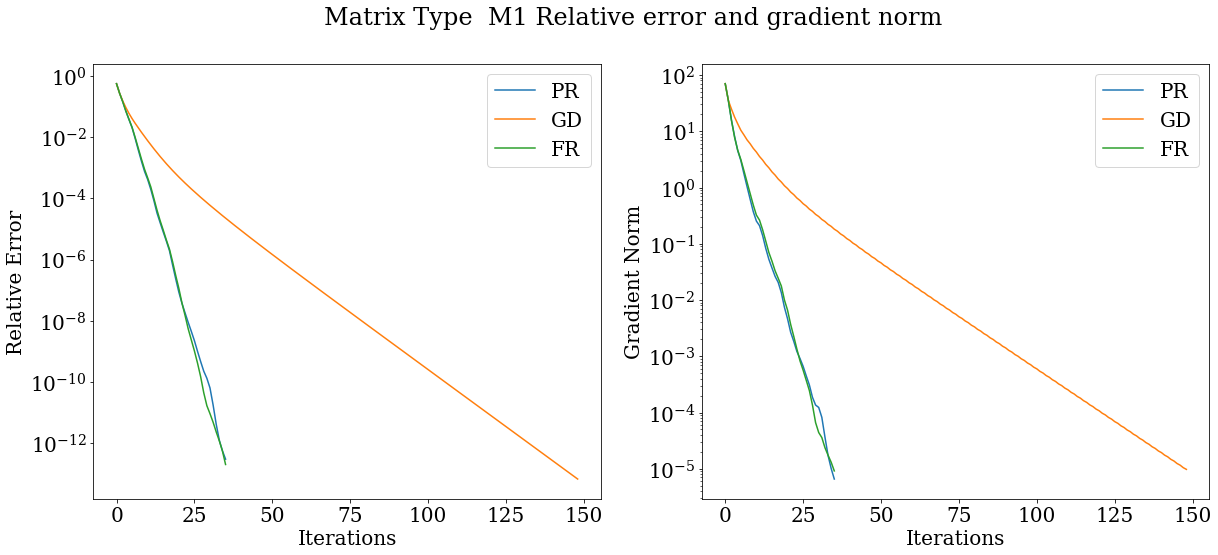

In [22]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M1', experiment_name='CG-GD-M1')

# Experiments on Matrix M2

In [23]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [24]:
f = nf.Norm(M2)
initial_vector = f.init_x()
norm = la.norm(M2, ord=2) ** 2

In [25]:
initial_vector = f.init_x()

In [26]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2386.0353, ||gradient(f(x))|| = 6118.972216, alpha=0.0261, rate=0.0000
iteration 2, f(x) = 2540.1345, ||gradient(f(x))|| = 1055.276925, alpha=0.0658, rate=0.4576
iteration 3, f(x) = 2588.2446, ||gradient(f(x))|| = 404.229184, alpha=0.1009, rate=0.3997
iteration 4, f(x) = 2619.1245, ||gradient(f(x))|| = 140.178888, alpha=0.1721, rate=0.5311
iteration 5, f(x) = 2629.8840, ||gradient(f(x))|| = 36.858452, alpha=0.1652, rate=0.4333
iteration 6, f(x) = 2634.5179, ||gradient(f(x))|| = 22.504316, alpha=0.2636, rate=0.5443
iteration 7, f(x) = 2637.8588, ||gradient(f(x))|| = 12.812827, alpha=0.3114, rate=0.6395
iteration 8, f(x) = 2640.2518, ||gradient(f(x))|| = 7.114168, alpha=0.3919, rate=0.5936
iteration 9, f(x) = 2641.5041, ||gradient(f(x))|| = 4.065285, alpha=0.3643, rate=0.5095
iteration 10, f(x) = 2642.2229, ||gradient(f(x))|| = 2.006907, alpha=0.3624, rate=0.4963
iteration 11, f(x) = 2642.5864, ||gradient(f(x))|| = 0.632071, alpha=0.3678, rate=0.4174
iteration

HS beta

In [27]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='HS', verbose = True)
gradientsCG_HS, normsCG, errorsCG_HS = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2386.0353, ||gradient(f(x))|| = 6118.972216, alpha=0.0261, rate=0.0000
iteration 2, f(x) = 2540.1345, ||gradient(f(x))|| = 1055.276925, alpha=0.0658, rate=0.4576
iteration 3, f(x) = 2588.2446, ||gradient(f(x))|| = 404.229184, alpha=0.1009, rate=0.3997
iteration 4, f(x) = 2619.1245, ||gradient(f(x))|| = 140.178888, alpha=0.1721, rate=0.5311
iteration 5, f(x) = 2629.8840, ||gradient(f(x))|| = 36.858452, alpha=0.1652, rate=0.4333
iteration 6, f(x) = 2634.5179, ||gradient(f(x))|| = 22.504316, alpha=0.2636, rate=0.5443
iteration 7, f(x) = 2637.8588, ||gradient(f(x))|| = 12.812827, alpha=0.3114, rate=0.6395
iteration 8, f(x) = 2640.2518, ||gradient(f(x))|| = 7.114168, alpha=0.3919, rate=0.5936
iteration 9, f(x) = 2641.5041, ||gradient(f(x))|| = 4.065285, alpha=0.3643, rate=0.5095
iteration 10, f(x) = 2642.2229, ||gradient(f(x))|| = 2.006907, alpha=0.3624, rate=0.4963
iteration 11, f(x) = 2642.5864, ||gradient(f(x))|| = 0.632071, alpha=0.3678, rate=0.4174
iteration

FR beta

In [28]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2386.0353, ||gradient(f(x))|| = 6118.972216, alpha=0.0261, rate=0.0000
iteration 2, f(x) = 2540.1345, ||gradient(f(x))|| = 1055.276925, alpha=0.0658, rate=0.4576
iteration 3, f(x) = 2588.7770, ||gradient(f(x))|| = 381.219637, alpha=0.1047, rate=0.3997
iteration 4, f(x) = 2618.8362, ||gradient(f(x))|| = 134.290026, alpha=0.1776, rate=0.5259
iteration 5, f(x) = 2629.5432, ||gradient(f(x))|| = 38.450430, alpha=0.1696, rate=0.4429
iteration 6, f(x) = 2634.1974, ||gradient(f(x))|| = 23.644817, alpha=0.2506, rate=0.5520
iteration 7, f(x) = 2637.6633, ||gradient(f(x))|| = 13.879089, alpha=0.3036, rate=0.6473
iteration 8, f(x) = 2640.0000, ||gradient(f(x))|| = 8.404166, alpha=0.3480, rate=0.5942
iteration 9, f(x) = 2641.3364, ||gradient(f(x))|| = 4.801430, alpha=0.3260, rate=0.5395
iteration 10, f(x) = 2642.1415, ||gradient(f(x))|| = 2.449805, alpha=0.3416, rate=0.5119
iteration 11, f(x) = 2642.5420, ||gradient(f(x))|| = 0.906272, alpha=0.3306, rate=0.4255
iteration

gradient descent

In [29]:
optimizerSGD = GD.GradientDescent(f, initial_vector, 1e-5, fstar = norm, verbose = True)
gradientsSGD, normsSGD, errorsSGD = optimizerSGD.run(500)

[start]
iteration 0, f(x) = 2386.0353, ||gradient(f(x))|| = 78.223860, alpha=0.0261, rate=0.0000
iteration 1, f(x) = 2520.0800, ||gradient(f(x))|| = 54.801564, alpha=0.0438, rate=0.4576
iteration 2, f(x) = 2570.9268, ||gradient(f(x))|| = 33.299186, alpha=0.0339, rate=0.4778
iteration 3, f(x) = 2597.6234, ||gradient(f(x))|| = 29.177905, alpha=0.0482, rate=0.5855
iteration 4, f(x) = 2612.7489, ||gradient(f(x))|| = 19.289553, alpha=0.0355, rate=0.6282
iteration 5, f(x) = 2621.7707, ||gradient(f(x))|| = 17.533674, alpha=0.0485, rate=0.6647
iteration 6, f(x) = 2627.3238, ||gradient(f(x))|| = 12.091082, alpha=0.0361, rate=0.6992
iteration 7, f(x) = 2630.9363, ||gradient(f(x))|| = 11.565060, alpha=0.0494, rate=0.7352
iteration 8, f(x) = 2633.3997, ||gradient(f(x))|| = 8.404270, alpha=0.0368, rate=0.7656
iteration 9, f(x) = 2635.1834, ||gradient(f(x))|| = 8.469368, alpha=0.0505, rate=0.7913
iteration 10, f(x) = 2636.5249, ||gradient(f(x))|| = 6.404184, alpha=0.0374, rate=0.8090
iteration 11, f

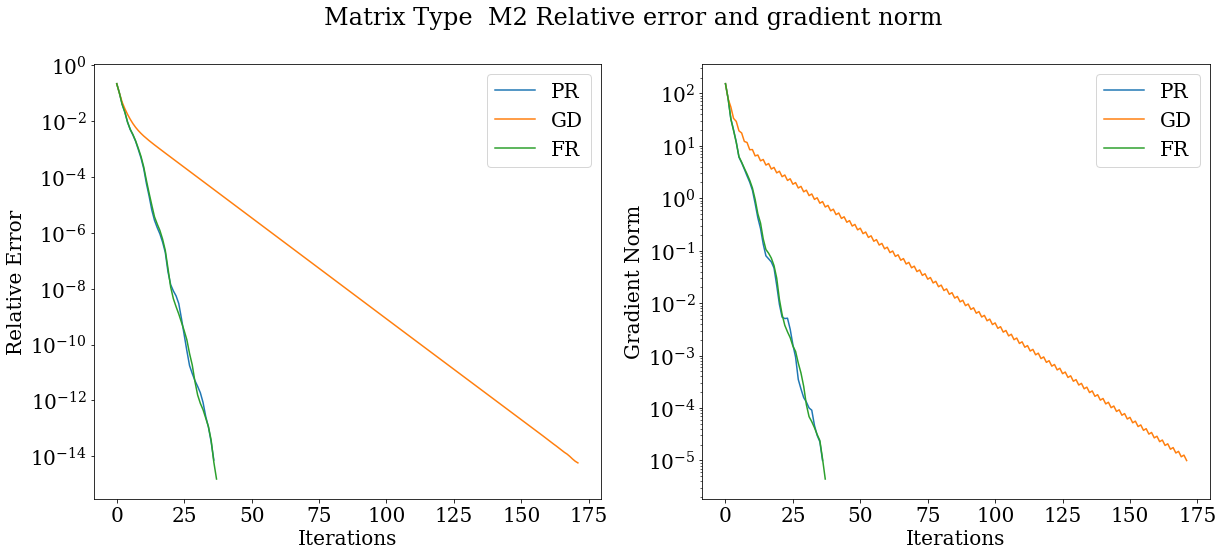

In [30]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M2', experiment_name='CG-GD-M2')

# Experiments on Matrix M3

In [31]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [32]:
f = nf.Norm(M3)
initial_vector = f.init_x()
norm = la.norm(M3, ord=2) ** 2

In [33]:
initial_vector = f.init_x()

In [34]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 616.8823, ||gradient(f(x))|| = 512.467638, alpha=0.0664, rate=0.0000
iteration 2, f(x) = 645.0026, ||gradient(f(x))|| = 190.691398, alpha=0.1299, rate=0.4719
iteration 3, f(x) = 663.4752, ||gradient(f(x))|| = 50.735847, alpha=0.2362, rate=0.5342
iteration 4, f(x) = 671.5886, ||gradient(f(x))|| = 16.558555, alpha=0.3679, rate=0.4273
iteration 5, f(x) = 674.9006, ||gradient(f(x))|| = 5.166643, alpha=0.4369, rate=0.4113
iteration 6, f(x) = 676.4172, ||gradient(f(x))|| = 1.994416, alpha=0.6239, rate=0.4157
iteration 7, f(x) = 677.0583, ||gradient(f(x))|| = 0.526715, alpha=0.6671, rate=0.3562
iteration 8, f(x) = 677.1904, ||gradient(f(x))|| = 0.095986, alpha=0.5071, rate=0.2361
iteration 9, f(x) = 677.2263, ||gradient(f(x))|| = 0.039270, alpha=0.7492, rate=0.3331
iteration 10, f(x) = 677.2413, ||gradient(f(x))|| = 0.017226, alpha=0.7697, rate=0.4570
iteration 11, f(x) = 677.2478, ||gradient(f(x))|| = 0.008637, alpha=0.7473, rate=0.4997
iteration 12, f(x) = 677.25

HS beta

In [35]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='HS', verbose = True)
gradientsCG_HS, normsCG, errorsCG_HS = optimizerCG.run(500)

[start]
iteration 1, f(x) = 616.8823, ||gradient(f(x))|| = 512.467638, alpha=0.0664, rate=0.0000
iteration 2, f(x) = 645.0026, ||gradient(f(x))|| = 190.691398, alpha=0.1299, rate=0.4719
iteration 3, f(x) = 663.4752, ||gradient(f(x))|| = 50.735847, alpha=0.2362, rate=0.5342
iteration 4, f(x) = 671.5886, ||gradient(f(x))|| = 16.558555, alpha=0.3679, rate=0.4273
iteration 5, f(x) = 674.9006, ||gradient(f(x))|| = 5.166643, alpha=0.4369, rate=0.4113
iteration 6, f(x) = 676.4172, ||gradient(f(x))|| = 1.994416, alpha=0.6239, rate=0.4157
iteration 7, f(x) = 677.0583, ||gradient(f(x))|| = 0.526715, alpha=0.6671, rate=0.3562
iteration 8, f(x) = 677.1904, ||gradient(f(x))|| = 0.095986, alpha=0.5071, rate=0.2361
iteration 9, f(x) = 677.2263, ||gradient(f(x))|| = 0.039270, alpha=0.7492, rate=0.3331
iteration 10, f(x) = 677.2413, ||gradient(f(x))|| = 0.017226, alpha=0.7697, rate=0.4570
iteration 11, f(x) = 677.2478, ||gradient(f(x))|| = 0.008637, alpha=0.7473, rate=0.4997
iteration 12, f(x) = 677.25

FR beta

In [36]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 616.8823, ||gradient(f(x))|| = 512.467638, alpha=0.0664, rate=0.0000
iteration 2, f(x) = 645.0026, ||gradient(f(x))|| = 190.691398, alpha=0.1299, rate=0.4719
iteration 3, f(x) = 663.5924, ||gradient(f(x))|| = 47.816090, alpha=0.2421, rate=0.5342
iteration 4, f(x) = 671.4786, ||gradient(f(x))|| = 16.843249, alpha=0.3720, rate=0.4236
iteration 5, f(x) = 674.7779, ||gradient(f(x))|| = 5.745483, alpha=0.4190, rate=0.4229
iteration 6, f(x) = 676.3112, ||gradient(f(x))|| = 2.475624, alpha=0.5560, rate=0.4290
iteration 7, f(x) = 677.0057, ||gradient(f(x))|| = 0.747922, alpha=0.5752, rate=0.3814
iteration 8, f(x) = 677.1770, ||gradient(f(x))|| = 0.142093, alpha=0.4615, rate=0.2652
iteration 9, f(x) = 677.2202, ||gradient(f(x))|| = 0.060219, alpha=0.6095, rate=0.3169
iteration 10, f(x) = 677.2394, ||gradient(f(x))|| = 0.024142, alpha=0.6389, rate=0.4563
iteration 11, f(x) = 677.2468, ||gradient(f(x))|| = 0.010827, alpha=0.6127, rate=0.4701
iteration 12, f(x) = 677.25

gradient descent

In [37]:
optimizerSGD = GD.GradientDescent(f, initial_vector, 1e-5, fstar = norm, verbose = True)
gradientsSGD, normsSGD, errorsSGD = optimizerSGD.run(500)

[start]
iteration 0, f(x) = 616.8823, ||gradient(f(x))|| = 22.637748, alpha=0.0664, rate=0.0000
iteration 1, f(x) = 640.6840, ||gradient(f(x))|| = 18.428862, alpha=0.0929, rate=0.4719
iteration 2, f(x) = 654.4879, ||gradient(f(x))|| = 13.364441, alpha=0.0813, rate=0.6058
iteration 3, f(x) = 663.1370, ||gradient(f(x))|| = 11.188973, alpha=0.0968, rate=0.6226
iteration 4, f(x) = 668.4142, ||gradient(f(x))|| = 8.069792, alpha=0.0843, rate=0.6201
iteration 5, f(x) = 671.6381, ||gradient(f(x))|| = 6.782181, alpha=0.0990, rate=0.6262
iteration 6, f(x) = 673.6229, ||gradient(f(x))|| = 4.982110, alpha=0.0863, rate=0.6354
iteration 7, f(x) = 674.8749, ||gradient(f(x))|| = 4.281484, alpha=0.1009, rate=0.6467
iteration 8, f(x) = 675.6773, ||gradient(f(x))|| = 3.205113, alpha=0.0876, rate=0.6554
iteration 9, f(x) = 676.2009, ||gradient(f(x))|| = 2.796488, alpha=0.1019, rate=0.6630
iteration 10, f(x) = 676.5457, ||gradient(f(x))|| = 2.114902, alpha=0.0882, rate=0.6684
iteration 11, f(x) = 676.7748,

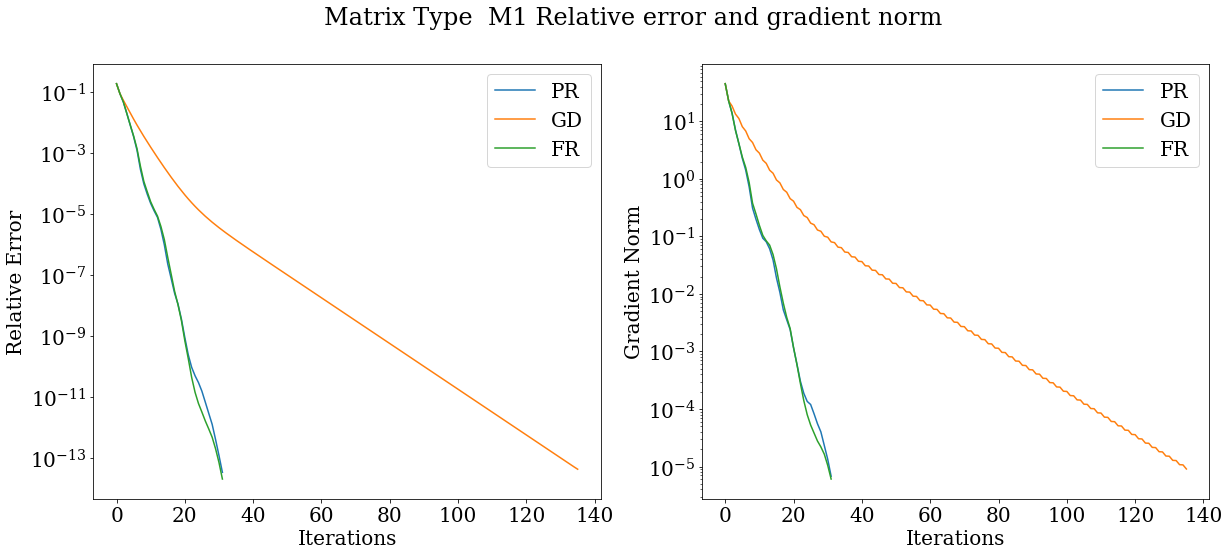

In [38]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M1', experiment_name='CG-GD-M3')

# Experiments on Matrix M4

In [39]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [40]:
f = nf.Norm(M4)
initial_vector = f.init_x()
norm = la.norm(M4, ord=2) ** 2

In [41]:
initial_vector = f.init_x()

In [42]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2119.7184, ||gradient(f(x))|| = 11.651939, alpha=5.6971, rate=0.0000
iteration 2, f(x) = 2326.7849, ||gradient(f(x))|| = 3.170181, alpha=39.3919, rate=0.2048
iteration 3, f(x) = 2470.5269, ||gradient(f(x))|| = 0.997935, alpha=125.1112, rate=0.6099
iteration 4, f(x) = 2559.2313, ||gradient(f(x))|| = 0.263955, alpha=235.1031, rate=0.5560
iteration 5, f(x) = 2584.5696, ||gradient(f(x))|| = 0.199338, alpha=212.7236, rate=0.5072
iteration 6, f(x) = 2601.9894, ||gradient(f(x))|| = 0.054427, alpha=191.2017, rate=0.7224
iteration 7, f(x) = 2615.7974, ||gradient(f(x))|| = 0.018774, alpha=567.2976, rate=0.7359
iteration 8, f(x) = 2620.2277, ||gradient(f(x))|| = 0.026795, alpha=500.3974, rate=0.7155
iteration 9, f(x) = 2627.1650, ||gradient(f(x))|| = 0.013761, alpha=578.3370, rate=0.8724
iteration 10, f(x) = 2636.7701, ||gradient(f(x))|| = 0.015038, alpha=1755.8021, rate=0.7710
iteration 11, f(x) = 2641.5614, ||gradient(f(x))|| = 0.005316, alpha=726.7717, rate=0.5887
i

HS beta

In [43]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='HS', verbose = True)
gradientsCG_HS, normsCG, errorsCG_HS = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2119.7184, ||gradient(f(x))|| = 11.651939, alpha=5.6971, rate=0.0000
iteration 2, f(x) = 2326.7849, ||gradient(f(x))|| = 3.170181, alpha=39.3919, rate=0.2048
iteration 3, f(x) = 2470.5269, ||gradient(f(x))|| = 0.997935, alpha=125.1112, rate=0.6099
iteration 4, f(x) = 2559.2313, ||gradient(f(x))|| = 0.263955, alpha=235.1031, rate=0.5560
iteration 5, f(x) = 2584.5696, ||gradient(f(x))|| = 0.199338, alpha=212.7236, rate=0.5072
iteration 6, f(x) = 2601.9894, ||gradient(f(x))|| = 0.054427, alpha=191.2017, rate=0.7224
iteration 7, f(x) = 2615.7974, ||gradient(f(x))|| = 0.018774, alpha=567.2976, rate=0.7359
iteration 8, f(x) = 2620.2277, ||gradient(f(x))|| = 0.026795, alpha=500.3974, rate=0.7155
iteration 9, f(x) = 2627.1650, ||gradient(f(x))|| = 0.013761, alpha=578.3370, rate=0.8724
iteration 10, f(x) = 2636.7701, ||gradient(f(x))|| = 0.015038, alpha=1755.8021, rate=0.7710
iteration 11, f(x) = 2641.5614, ||gradient(f(x))|| = 0.005316, alpha=726.7717, rate=0.5887
i

FR beta

In [44]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2119.7184, ||gradient(f(x))|| = 11.651939, alpha=5.6971, rate=0.0000
iteration 2, f(x) = 2326.7849, ||gradient(f(x))|| = 3.170181, alpha=39.3919, rate=0.2048
iteration 3, f(x) = 2470.5259, ||gradient(f(x))|| = 0.997438, alpha=125.1363, rate=0.6099
iteration 4, f(x) = 2559.3715, ||gradient(f(x))|| = 0.260337, alpha=236.8037, rate=0.5560
iteration 5, f(x) = 2584.1098, ||gradient(f(x))|| = 0.198722, alpha=207.1039, rate=0.5064
iteration 6, f(x) = 2601.2330, ||gradient(f(x))|| = 0.060674, alpha=185.4902, rate=0.7286
iteration 7, f(x) = 2614.0373, ||gradient(f(x))|| = 0.036391, alpha=451.5400, rate=0.7422
iteration 8, f(x) = 2618.4152, ||gradient(f(x))|| = 0.022920, alpha=248.1506, rate=0.7402
iteration 9, f(x) = 2625.9303, ||gradient(f(x))|| = 0.021967, alpha=698.4620, rate=0.8800
iteration 10, f(x) = 2631.8408, ||gradient(f(x))|| = 0.029410, alpha=577.0839, rate=0.7659
iteration 11, f(x) = 2639.7855, ||gradient(f(x))|| = 0.012712, alpha=608.5551, rate=0.7596
it

gradient descent

In [45]:
optimizerSGD = GD.GradientDescent(f, initial_vector, 1e-5, fstar = norm, verbose = True)
gradientsSGD, normsSGD, errorsSGD = optimizerSGD.run(500)

[start]
iteration 0, f(x) = 2119.7184, ||gradient(f(x))|| = 3.413494, alpha=5.6971, rate=0.0000
iteration 1, f(x) = 2326.4667, ||gradient(f(x))|| = 1.992170, alpha=35.4874, rate=0.2048
iteration 2, f(x) = 2434.2105, ||gradient(f(x))|| = 2.161892, alpha=54.2962, rate=0.6105
iteration 3, f(x) = 2485.8447, ||gradient(f(x))|| = 1.835982, alpha=22.0953, rate=0.6675
iteration 4, f(x) = 2515.6419, ||gradient(f(x))|| = 1.419016, alpha=17.6795, rate=0.7613
iteration 5, f(x) = 2539.5127, ||gradient(f(x))|| = 1.450568, alpha=23.7095, rate=0.8191
iteration 6, f(x) = 2558.3747, ||gradient(f(x))|| = 1.110513, alpha=17.9284, rate=0.8230
iteration 7, f(x) = 2573.0317, ||gradient(f(x))|| = 1.114943, alpha=23.7700, rate=0.8301
iteration 8, f(x) = 2584.2788, ||gradient(f(x))|| = 0.849493, alpha=18.0954, rate=0.8409
iteration 9, f(x) = 2592.9244, ||gradient(f(x))|| = 0.854162, alpha=23.9608, rate=0.8548
iteration 10, f(x) = 2599.5989, ||gradient(f(x))|| = 0.657498, alpha=18.2965, rate=0.8695
iteration 11,

iteration 96, f(x) = 2650.4720, ||gradient(f(x))|| = 0.017248, alpha=19.3553, rate=0.9166
iteration 97, f(x) = 2650.4758, ||gradient(f(x))|| = 0.018998, alpha=25.6182, rate=0.9166
iteration 98, f(x) = 2650.4793, ||gradient(f(x))|| = 0.015810, alpha=19.3554, rate=0.9166
iteration 99, f(x) = 2650.4825, ||gradient(f(x))|| = 0.017414, alpha=25.6183, rate=0.9166
iteration 100, f(x) = 2650.4855, ||gradient(f(x))|| = 0.014491, alpha=19.3554, rate=0.9166
iteration 101, f(x) = 2650.4882, ||gradient(f(x))|| = 0.015962, alpha=25.6183, rate=0.9166
iteration 102, f(x) = 2650.4906, ||gradient(f(x))|| = 0.013283, alpha=19.3555, rate=0.9166
iteration 103, f(x) = 2650.4929, ||gradient(f(x))|| = 0.014631, alpha=25.6184, rate=0.9166
iteration 104, f(x) = 2650.4950, ||gradient(f(x))|| = 0.012176, alpha=19.3555, rate=0.9166
iteration 105, f(x) = 2650.4969, ||gradient(f(x))|| = 0.013411, alpha=25.6185, rate=0.9167
iteration 106, f(x) = 2650.4986, ||gradient(f(x))|| = 0.011160, alpha=19.3556, rate=0.9167
ite

iteration 203, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000189, alpha=25.6195, rate=0.9167
iteration 204, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000157, alpha=19.3562, rate=0.9167
iteration 205, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000173, alpha=25.6195, rate=0.9167
iteration 206, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000144, alpha=19.3562, rate=0.9167
iteration 207, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000159, alpha=25.6195, rate=0.9167
iteration 208, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000132, alpha=19.3562, rate=0.9167
iteration 209, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000146, alpha=25.6195, rate=0.9167
iteration 210, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000121, alpha=19.3562, rate=0.9167
iteration 211, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000134, alpha=25.6195, rate=0.9167
iteration 212, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000111, alpha=19.3562, rate=0.9167
iteration 213, f(x) = 2650.5177, ||gradient(f(x))|| = 0.000122, alpha=25.6195, rate=0.9167

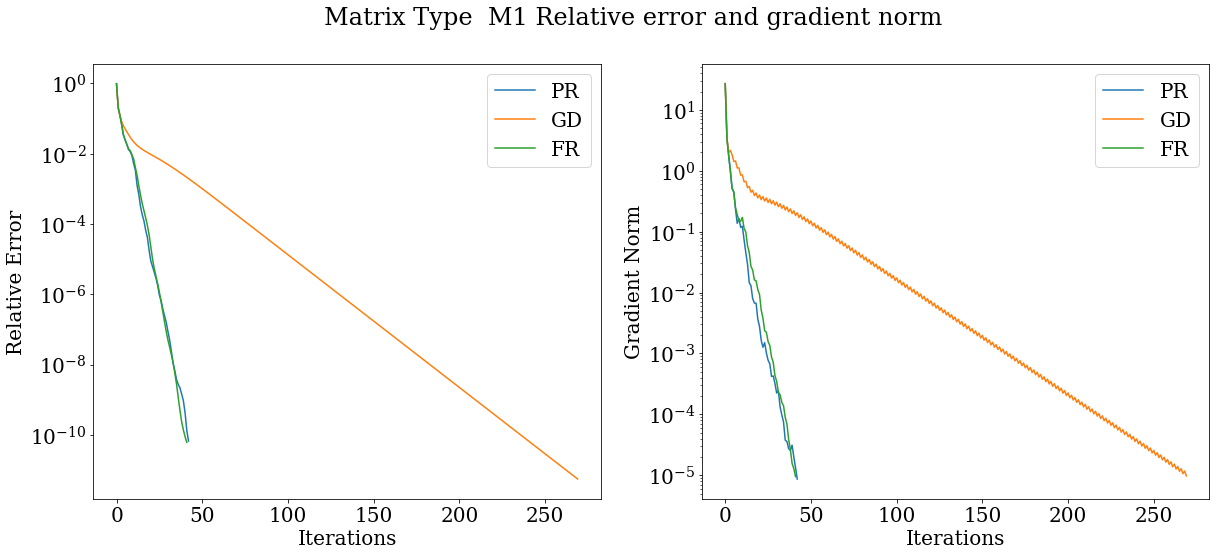

In [46]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M1', experiment_name='CG-GD-M4')

# Experiments on Matrix M5

In [47]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [48]:
f = nf.Norm(M5)
initial_vector = f.init_x()
norm = la.norm(M5, ord=2) ** 2

In [49]:
initial_vector = f.init_x()

In [50]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 66600.9892, ||gradient(f(x))|| = 84852.738618, alpha=0.1815, rate=0.0000
iteration 2, f(x) = 84848.9786, ||gradient(f(x))|| = 16017.588861, alpha=0.5933, rate=0.3380
iteration 3, f(x) = 94260.6750, ||gradient(f(x))|| = 3332.163874, alpha=1.4864, rate=0.4536
iteration 4, f(x) = 97621.7155, ||gradient(f(x))|| = 928.925930, alpha=2.3225, rate=0.3788
iteration 5, f(x) = 98958.1123, ||gradient(f(x))|| = 246.976976, alpha=3.1484, rate=0.4144
iteration 6, f(x) = 99462.3832, ||gradient(f(x))|| = 102.542492, alpha=4.3156, rate=0.4381
iteration 7, f(x) = 99694.7961, ||gradient(f(x))|| = 46.142662, alpha=4.7036, rate=0.5160
iteration 8, f(x) = 99835.8485, ||gradient(f(x))|| = 28.949892, alpha=6.3025, rate=0.5677
iteration 9, f(x) = 99914.3232, ||gradient(f(x))|| = 12.694591, alpha=5.5440, rate=0.5378
iteration 10, f(x) = 99956.5082, ||gradient(f(x))|| = 8.225782, alpha=6.7481, rate=0.5219
iteration 11, f(x) = 99982.2747, ||gradient(f(x))|| = 3.701766, alpha=6.3355, rat

HS beta

In [51]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='HS', verbose = True)
gradientsCG_HS, normsCG, errorsCG_HS = optimizerCG.run(500)

[start]
iteration 1, f(x) = 66600.9892, ||gradient(f(x))|| = 84852.738618, alpha=0.1815, rate=0.0000
iteration 2, f(x) = 84848.9786, ||gradient(f(x))|| = 16017.588861, alpha=0.5933, rate=0.3380
iteration 3, f(x) = 94260.6750, ||gradient(f(x))|| = 3332.163874, alpha=1.4864, rate=0.4536
iteration 4, f(x) = 97621.7155, ||gradient(f(x))|| = 928.925930, alpha=2.3225, rate=0.3788
iteration 5, f(x) = 98958.1123, ||gradient(f(x))|| = 246.976976, alpha=3.1484, rate=0.4144
iteration 6, f(x) = 99462.3832, ||gradient(f(x))|| = 102.542492, alpha=4.3156, rate=0.4381
iteration 7, f(x) = 99694.7961, ||gradient(f(x))|| = 46.142662, alpha=4.7036, rate=0.5160
iteration 8, f(x) = 99835.8485, ||gradient(f(x))|| = 28.949892, alpha=6.3025, rate=0.5677
iteration 9, f(x) = 99914.3232, ||gradient(f(x))|| = 12.694591, alpha=5.5440, rate=0.5378
iteration 10, f(x) = 99956.5082, ||gradient(f(x))|| = 8.225782, alpha=6.7481, rate=0.5219
iteration 11, f(x) = 99982.2747, ||gradient(f(x))|| = 3.701766, alpha=6.3355, rat

FR beta

In [52]:
optimizerCG = CG.conjugateGradient(f, initial_vector, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 66600.9892, ||gradient(f(x))|| = 84852.738618, alpha=0.1815, rate=0.0000
iteration 2, f(x) = 84848.9786, ||gradient(f(x))|| = 16017.588861, alpha=0.5933, rate=0.3380
iteration 3, f(x) = 94262.7933, ||gradient(f(x))|| = 3324.698413, alpha=1.4878, rate=0.4536
iteration 4, f(x) = 97549.8460, ||gradient(f(x))|| = 1016.898562, alpha=2.2204, rate=0.3787
iteration 5, f(x) = 98922.3946, ||gradient(f(x))|| = 287.377622, alpha=2.8969, rate=0.4271
iteration 6, f(x) = 99430.4410, ||gradient(f(x))|| = 127.503216, alpha=3.6698, rate=0.4398
iteration 7, f(x) = 99682.7601, ||gradient(f(x))|| = 56.439394, alpha=4.0614, rate=0.5285
iteration 8, f(x) = 99823.0278, ||gradient(f(x))|| = 37.085027, alpha=5.0686, rate=0.5570
iteration 9, f(x) = 99909.3497, ||gradient(f(x))|| = 16.459760, alpha=4.7313, rate=0.5578
iteration 10, f(x) = 99951.9144, ||gradient(f(x))|| = 10.732444, alpha=5.2253, rate=0.5122
iteration 11, f(x) = 99980.4791, ||gradient(f(x))|| = 5.038209, alpha=5.3681, r

gradient descent

In [53]:
optimizerSGD = GD.GradientDescent(f, initial_vector, 1e-5, fstar = norm, verbose = True)
gradientsSGD, normsSGD, errorsSGD = optimizerSGD.run(500)

[start]
iteration 0, f(x) = 66600.9892, ||gradient(f(x))|| = 291.294934, alpha=0.1815, rate=0.0000
iteration 1, f(x) = 84818.2819, ||gradient(f(x))|| = 175.387340, alpha=0.4294, rate=0.3380
iteration 2, f(x) = 92763.4269, ||gradient(f(x))|| = 120.657900, alpha=0.5166, rate=0.4546
iteration 3, f(x) = 96189.7324, ||gradient(f(x))|| = 78.587717, alpha=0.4707, rate=0.4767
iteration 4, f(x) = 97788.5976, ||gradient(f(x))|| = 58.421503, alpha=0.5178, rate=0.5265
iteration 5, f(x) = 98599.1267, ||gradient(f(x))|| = 41.385185, alpha=0.4750, rate=0.5804
iteration 6, f(x) = 99047.3781, ||gradient(f(x))|| = 33.308905, alpha=0.5234, rate=0.6335
iteration 7, f(x) = 99315.0834, ||gradient(f(x))|| = 25.385723, alpha=0.4826, rate=0.6800
iteration 8, f(x) = 99486.7639, ||gradient(f(x))|| = 21.799044, alpha=0.5328, rate=0.7190
iteration 9, f(x) = 99603.3032, ||gradient(f(x))|| = 17.534827, alpha=0.4905, rate=0.7493
iteration 10, f(x) = 99686.4606, ||gradient(f(x))|| = 15.750694, alpha=0.5409, rate=0.772

iteration 113, f(x) = 99999.9985, ||gradient(f(x))|| = 0.021700, alpha=0.5137, rate=0.9126
iteration 114, f(x) = 99999.9986, ||gradient(f(x))|| = 0.021733, alpha=0.5647, rate=0.9126
iteration 115, f(x) = 99999.9987, ||gradient(f(x))|| = 0.019802, alpha=0.5137, rate=0.9126
iteration 116, f(x) = 99999.9988, ||gradient(f(x))|| = 0.019832, alpha=0.5647, rate=0.9126
iteration 117, f(x) = 99999.9989, ||gradient(f(x))|| = 0.018070, alpha=0.5137, rate=0.9126
iteration 118, f(x) = 99999.9990, ||gradient(f(x))|| = 0.018098, alpha=0.5647, rate=0.9126
iteration 119, f(x) = 99999.9991, ||gradient(f(x))|| = 0.016491, alpha=0.5137, rate=0.9126
iteration 120, f(x) = 99999.9992, ||gradient(f(x))|| = 0.016516, alpha=0.5647, rate=0.9126
iteration 121, f(x) = 99999.9993, ||gradient(f(x))|| = 0.015049, alpha=0.5137, rate=0.9126
iteration 122, f(x) = 99999.9993, ||gradient(f(x))|| = 0.015073, alpha=0.5647, rate=0.9126
iteration 123, f(x) = 99999.9994, ||gradient(f(x))|| = 0.013734, alpha=0.5137, rate=0.9126

iteration 215, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000205, alpha=0.5137, rate=0.9125
iteration 216, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000206, alpha=0.5647, rate=0.9129
iteration 217, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000187, alpha=0.5137, rate=0.9125
iteration 218, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000188, alpha=0.5647, rate=0.9130
iteration 219, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000171, alpha=0.5137, rate=0.9124
iteration 220, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000171, alpha=0.5647, rate=0.9125
iteration 221, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000156, alpha=0.5137, rate=0.9128
iteration 222, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000156, alpha=0.5647, rate=0.9124
iteration 223, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000142, alpha=0.5137, rate=0.9123
iteration 224, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000143, alpha=0.5647, rate=0.9130
iteration 225, f(x) = 100000.0000, ||gradient(f(x))|| = 0.000130, alpha=0.5137, 

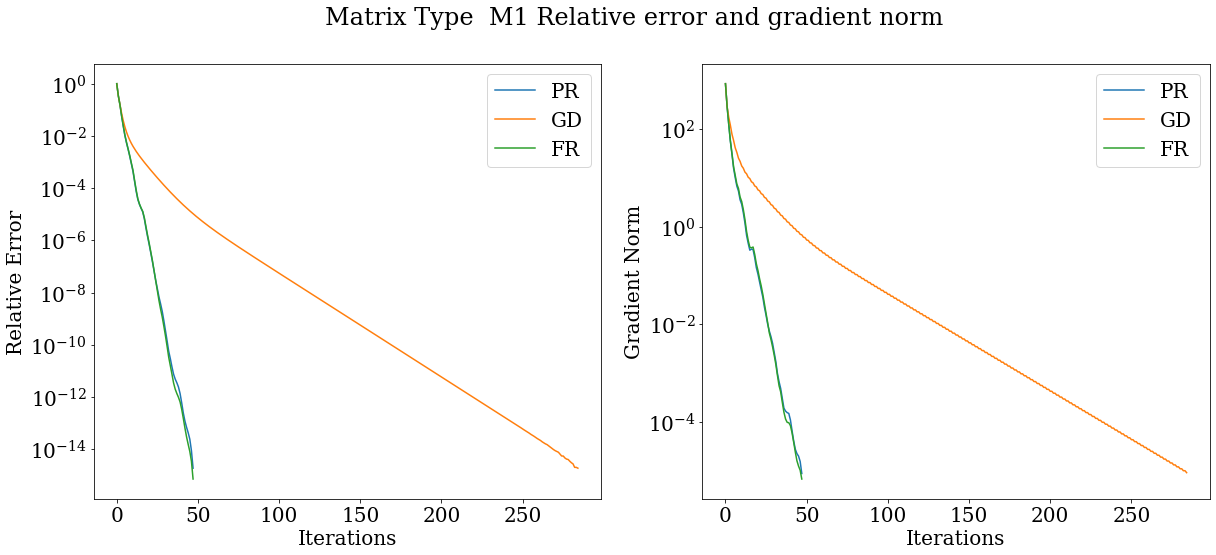

In [54]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M1', experiment_name='CG-GD-M5')